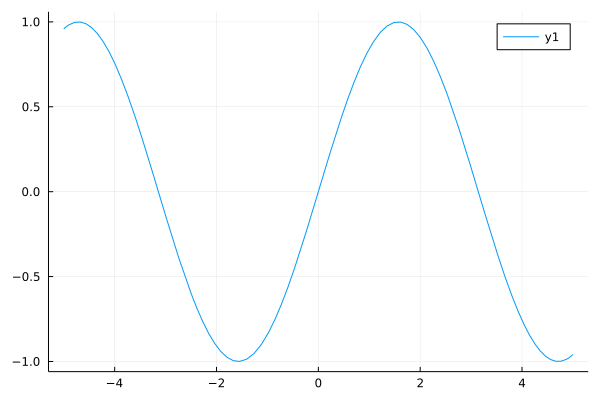

In [2]:
using Random
using Distributions
using Plots
plot(sin)

In [88]:
function diffvarvar(dist, n)
    σ = std(dist)
    μ₄ = kurtosis(dist) + 3
    σ^4/n^2 * ((2 - 1/n)*μ₄ - (3 - (5n-3)/(n*(n-1))))
end

function diffvarvarnormal(dist, n)
    σ = std(dist)
    (3n - 1)/(n^2*(n-1)) * σ^4
end

function var_unbiasedvar(dist, n)
    σ = std(dist)
    μ₄ = kurtosis(dist) + 3
    σ^4 * (μ₄/n - (n-3)/(n*(n-1)))
end

function var_var(dist, n)
    σ = std(dist)
    ((n-1)/n)^2 * var_unbiasedvar(dist, n) + σ^4/n^2
end

function simvar(dist, n; L = 10^7)
    σ² = var(dist)
    X = Vector{Float64}(undef, n)
    V = [var(rand!(dist, X); corrected=false) for _ in 1:L]
    U = [var(rand!(dist, X)) for _ in 1:L]
    varU = var(U; mean=σ²)
    varV = var(V; mean=σ²) 
    varU, varV, varU - varV
end

simvar (generic function with 2 methods)

In [89]:
dist = Normal(1, 2)
n = 10
simvar(dist, n; L = 10^8), var_unbiasedvar(dist, n), var_var(dist, n), diffvarvar(dist, n), diffvarvarnormal(dist, n)

((3.5547122795360577, 3.0406767062810496, 0.5140355732550081), 3.5555555555555554, 3.04, 0.5155555555555554, 0.5155555555555555)

In [90]:
dist = Exponential(2)
n = 10
simvar(dist, n; L = 10^8), var_unbiasedvar(dist, n), var_var(dist, n), diffvarvar(dist, n), diffvarvarnormal(dist, n)

((13.156818769168774, 10.824196426255655, 2.332622342913119), 13.155555555555555, 10.816, 2.339555555555555, 0.5155555555555555)

In [84]:
using SymPy
@vars σ μ₄ n

σ = 1
μ₄ = 0
vu = σ^4 * (μ₄/n - (n-3)/(n*(n-1)))
vv =  ((n-1)/n)^2 * vu + σ^4/n^2
([vu, vv, vu - vv] .|> simplify) .* -n^2 .|> simplify

3-element Vector{Sym}:
             n*(n - 3)/(n - 1)
                   n - 5 + 3/n
 (3*n^2 - 8*n + 3)/(n*(n - 1))